In [8]:
import pandas as pd

df = pd.read_csv("C:\\Users\\Hardik\\Desktop\\titanic-survivor-prediction\\train.csv")

# Drop columns that don't help
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


C:\Users\Hardik\AppData\Local\Temp\ipykernel_147388\1863215843.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Hardik\AppData\Local\Temp\ipykernel_147388\1863215843.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [9]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier()

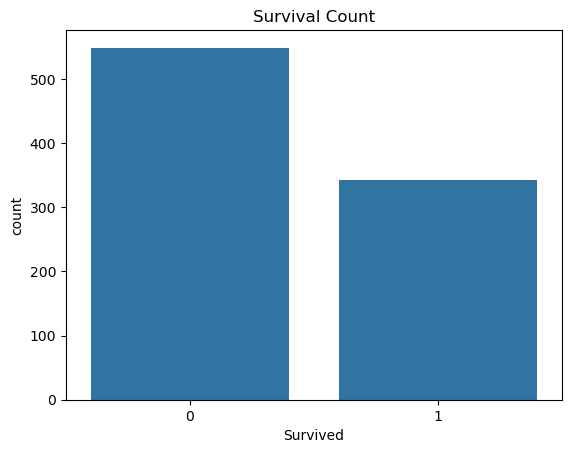

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=pd.read_csv("train.csv"))
plt.title("Survival Count")
plt.savefig("survival_count.png", dpi=300, bbox_inches='tight')
plt.show()


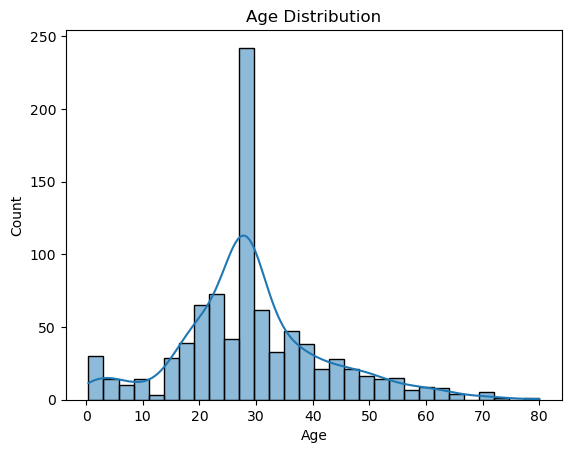

In [12]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.savefig("age_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


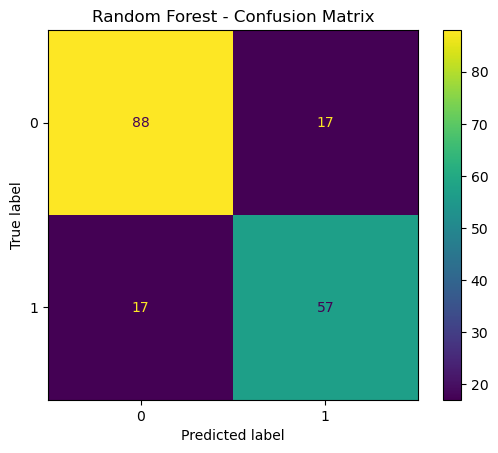

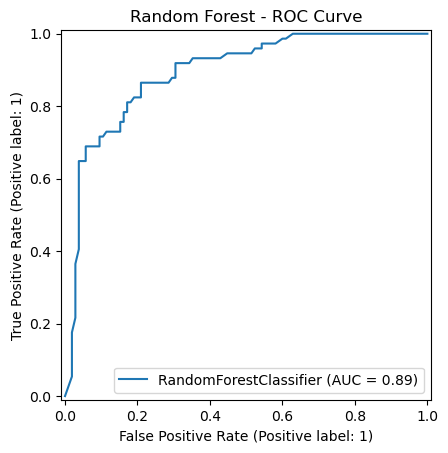

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# Confusion matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest - Confusion Matrix")
plt.savefig("rf_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# ROC Curve for Random Forest
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest - ROC Curve")
plt.savefig("rf_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {"Logistic Regression": lr, "Decision Tree": dt, "Random Forest": rf}
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

pd.DataFrame(results)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.810056,0.785714,0.743243,0.763889
1,Decision Tree,0.793296,0.746667,0.756757,0.751678
2,Random Forest,0.810056,0.770270,0.770270,0.770270


In [15]:
import joblib

# Save the model
joblib.dump(rf, "random_forest_model.pkl")


['random_forest_model.pkl']